# Assignment 3: Pie

This is a jupyter notebook in which we were asked to create a pie chart of the different email domains from a selected CSV file.

Author: Céaman Collins

First it is necessary to import the required libraries and packages. In this case requests to handle URLs, pandas to handle dataframes, matplotlip.pyplot to create plots, csv to read the csv file and numpy to handle arrays.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We can read CSV files straight from url using the following code.

In [12]:
url="https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
df = pd.read_csv(url, index_col=0, parse_dates=['Date of birth'])

df.head()

,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
Index,,,,,,,,
1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


I found [this geeks for geeks page](https://www.geeksforgeeks.org/python/python-extract-domain-name-from-email-address/) that explained how to extract domain names from email addresses.

Copilot suggested using a lambda function to utilise the split method and extract the domains.

In [ ]:
email_series = df['Email'].apply(lambda x: x.split('@')[1])
email_series.head()

Index
1    example.org
2    example.net
3    example.org
4    example.com
5    example.net
Name: Email, dtype: object

I then took the value counts of the email series.

In [4]:
email_counts = email_series.value_counts()
email_counts


Email
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

I found [this page from pythonexamples.org](https://pythonexamples.org/python-matplotlib-pie-chart-colors/) to help program colours for the pie chart. I adapted it to fit the plot as the first colour was almost white so I selected values that were not so close to 0 to avoid this.

In [5]:
colors = plt.cm.Blues(np.linspace(0.25, 1, len(email_counts)))

I then created the pie chart using the color settings from the above code and, using code from [pie chart examples from the matplotlib library](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html), added more detail to the plot for example shadows and explosion.

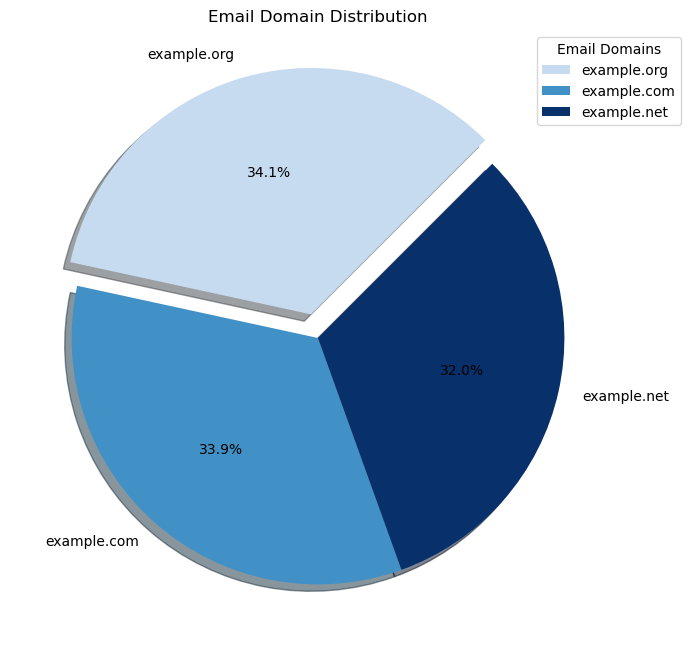

In [6]:
# Create pie chart with customized colors and title, removing ylabel with labels with percentages inside the pie slices
# Add shadow, startangle and explode to enhance the visual appeal
email_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Email Domain Distribution', colors=colors, shadow=True, startangle=45, explode=(0.1, 0, 0))
# Remove the ylabel as it was not necessary for this plot
plt.ylabel('')
# Add legend outside the pie chart
plt.legend(title='Email Domains', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()